In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
from sqlalchemy import create_engine

database_name = 'week1'
table_name = 'xdr_data'

connection_params = {
    "host": "localhost",
    "user": "postgres",
    "password": "lhtdss",
    "port": "5432",
    "database": database_name
}

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")

# str or SQLAlchemy Selectable (select or text object)
sql_query = 'SELECT * FROM xdr_data '

telecom = pd.read_sql(sql_query, con=engine)

In [27]:
########### ploting functions ############

def plot_hist(telecom:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=telecom, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(telecom:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=telecom, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(telecom:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = telecom, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(telecom:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(telecom, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()






def plot_box(telecom:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = telecom, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(telecom:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = telecom, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(telecom: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = telecom, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

In [8]:
telecom.columns.tolist()



['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [9]:
variable_info = telecom.dtypes.reset_index()
variable_info.columns = [ 'variable_info', 'Data Type']

print(variable_info)

                               variable_info Data Type
0                                  Bearer Id   float64
1                                      Start    object
2                                   Start ms   float64
3                                        End    object
4                                     End ms   float64
5                                  Dur. (ms)   float64
6                                       IMSI   float64
7                              MSISDN/Number   float64
8                                       IMEI   float64
9                         Last Location Name    object
10                           Avg RTT DL (ms)   float64
11                           Avg RTT UL (ms)   float64
12                   Avg Bearer TP DL (kbps)   float64
13                   Avg Bearer TP UL (kbps)   float64
14               TCP DL Retrans. Vol (Bytes)   float64
15               TCP UL Retrans. Vol (Bytes)   float64
16                       DL TP < 50 Kbps (%)   float64
17        

In [10]:
telecom[[ 
 'Bearer Id',
 'Handset Manufacturer',
 'Handset Type', 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)' ]].head(5)


Bearer Id Handset Manufacturer                 Handset Type  \
0  1.311448e+19              Samsung   Samsung Galaxy A5 Sm-A520F   
1  1.311448e+19              Samsung  Samsung Galaxy J5 (Sm-J530)   
2  1.311448e+19              Samsung     Samsung Galaxy A8 (2018)   
3  1.311448e+19            undefined                    undefined   
4  1.311448e+19              Samsung             Samsung Sm-G390F   

             Start  Start ms              End  End ms  Dur. (ms)  \
0   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0  1823652.0   
1   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0  1365104.0   
2   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0  1361762.0   
3   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0  1321509.0   
4  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0  1089009.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  ...  Youtube DL (Bytes)  \
0                1545765.0                  24420.0  ...          15854611.0   
1                1926113.0                   7165.0  ...          20247395.0   
2                1684053.0                  42224.0  ...          19725661.0   
3                 644121.0                  13372.0  ...          21388122.0   
4                 862600.0                  50188.0  ...          15259380.0   

   Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0           2501332.0           8198936.0           9656251.0   
1          19111729.0          18338413.0          17227132.0   
2          14699576.0          17587794.0           6163408.0   
3          15146643.0          13994646.0           1097942.0   
4          18962873.0          17124581.0            415218.0   

   Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0        278082303.0         14344150.0       171744450.0         8814393.0   
1        608750074.0          1170709.0       526904238.0        15055145.0   
2        229584621.0           395630.0       410692588.0         4215763.0   
3        799538153.0         10849722.0       749039933.0        12797283.0   
4        527707248.0          3529801.0       550709500.0        13910322.0   

   Total UL (Bytes)  Total DL (Bytes)  
0        36749741.0       308879636.0  
1        53800391.0       653384965.0  
2        27883638.0       279807335.0  
3        43324218.0       846028530.0  
4        38542814.0       569138589.0  

[5 rows x 24 columns]

In [35]:
basic_metrics = telecom.describe().transpose()[['mean', '50%', 'min', 'max']]
basic_metrics.columns = ['Mean', 'Median','min', 'max']

print(basic_metrics)

                                                  Mean        Median  \
Bearer Id                                 1.013887e+19  7.349883e+18   
Start ms                                  4.991882e+02  4.990000e+02   
End ms                                    4.988009e+02  5.000000e+02   
Dur. (ms)                                 1.046086e+05  8.639900e+04   
IMSI                                      2.082016e+14  2.082015e+14   
MSISDN/Number                             4.188282e+10  3.366371e+10   
IMEI                                      4.847455e+13  3.572201e+13   
Avg RTT DL (ms)                           1.097957e+02  4.500000e+01   
Avg RTT UL (ms)                           1.766288e+01  5.000000e+00   
Avg Bearer TP DL (kbps)                   1.330005e+04  6.300000e+01   
Avg Bearer TP UL (kbps)                   1.770429e+03  6.300000e+01   
TCP DL Retrans. Vol (Bytes)               2.080991e+07  5.687300e+05   
TCP UL Retrans. Vol (Bytes)               7.596587e+05  2.094950

In [59]:
# Calculate dispersion parameters ( standard deviation)
dispersion_parameters = telecom[[ 
 'Bearer Id',
 'End ms',
 'Dur. (ms)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)' ]].std()




print(dispersion_parameters)


Bearer Id                  2.893173e+18
End ms                     2.880977e+02
Dur. (ms)                  8.103762e+04
Social Media DL (Bytes)    1.035482e+06
Social Media UL (Bytes)    1.900618e+04
Google DL (Bytes)          3.309097e+06
Google UL (Bytes)          1.189917e+06
Email DL (Bytes)           1.035840e+06
Email UL (Bytes)           2.699693e+05
Youtube DL (Bytes)         6.710569e+06
Youtube UL (Bytes)         6.345423e+06
Netflix DL (Bytes)         6.725218e+06
Netflix UL (Bytes)         6.359490e+06
Gaming DL (Bytes)          2.439675e+08
Gaming UL (Bytes)          4.782700e+06
Other DL (Bytes)           2.432050e+08
Other UL (Bytes)           4.769004e+06
Total UL (Bytes)           1.127639e+07
Total DL (Bytes)           2.441429e+08
dtype: float64


In [45]:
dispersion_parameters = telecom[[ 
 'Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)' ]].dtypes

print(dispersion_parameters)


Bearer Id                  float64
Start                       object
Start ms                   float64
End                         object
End ms                     float64
Dur. (ms)                  float64
Social Media DL (Bytes)    float64
Social Media UL (Bytes)    float64
Google DL (Bytes)          float64
Google UL (Bytes)          float64
Email DL (Bytes)           float64
Email UL (Bytes)           float64
Youtube DL (Bytes)         float64
Youtube UL (Bytes)         float64
Netflix DL (Bytes)         float64
Netflix UL (Bytes)         float64
Gaming DL (Bytes)          float64
Gaming UL (Bytes)          float64
Other DL (Bytes)           float64
Other UL (Bytes)           float64
Total UL (Bytes)           float64
Total DL (Bytes)           float64
dtype: object


In [14]:
# convertin duration to second

telecom ['duraion_in_sec']= telecom['Dur. (ms)']/1000
telecom ['duraion_in_sec']



0         1823.652
1         1365.104
2         1361.762
3         1321.509
4         1089.009
            ...   
149996      81.230
149997      97.970
149998      98.249
149999      97.910
150000         NaN
Name: duraion_in_sec, Length: 150001, dtype: float64

In [15]:
# convertin duration to minutes
telecom ['duraion_in_minutes'] =telecom ['duraion_in_sec']/60
telecom ['duraion_in_minutes']

0         30.394200
1         22.751733
2         22.696033
3         22.025150
4         18.150150
            ...    
149996     1.353833
149997     1.632833
149998     1.637483
149999     1.631833
150000          NaN
Name: duraion_in_minutes, Length: 150001, dtype: float64

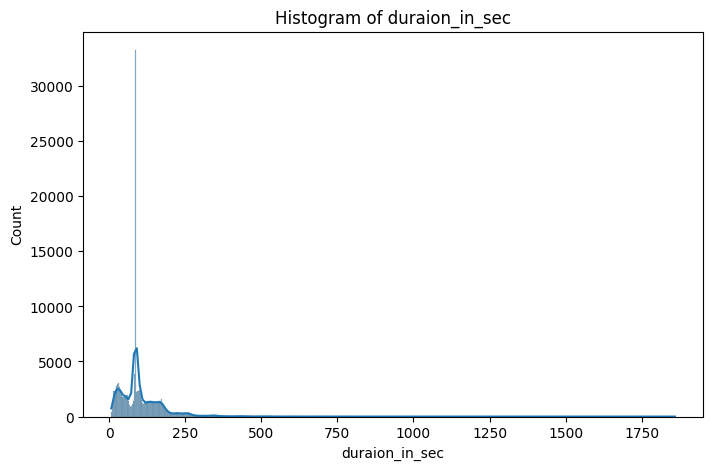

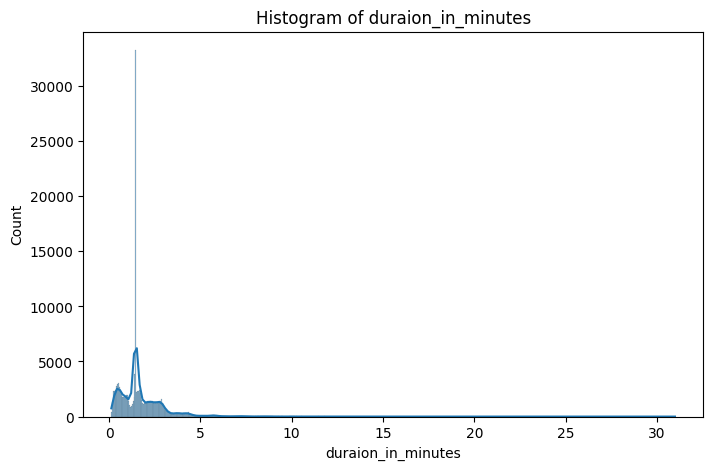

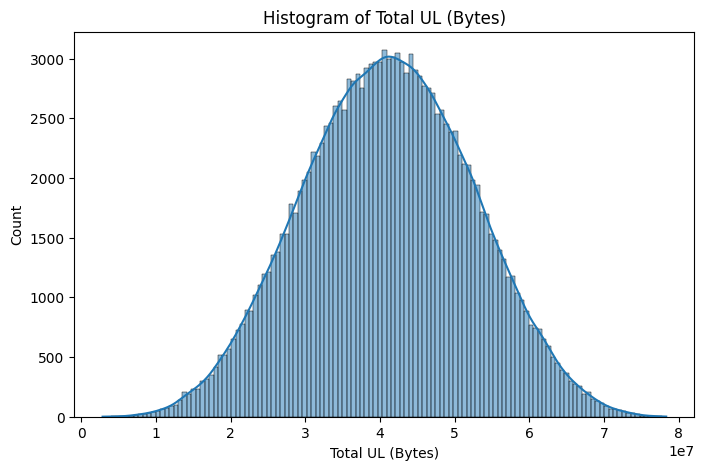

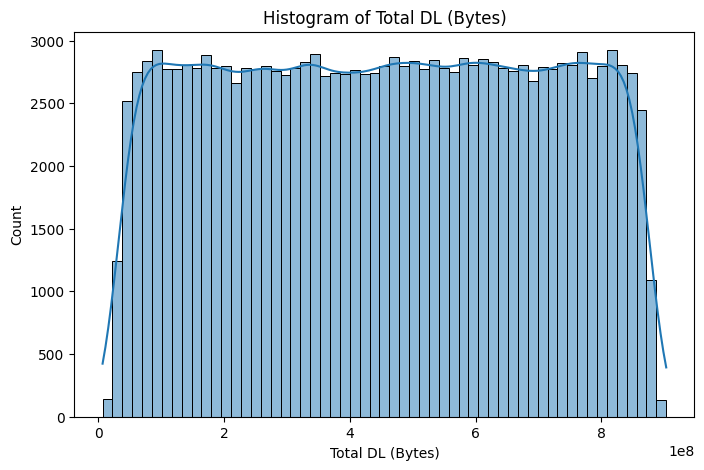

In [17]:
# Plot histograms for selected variables
selected_variables = [ 'duraion_in_sec', 'duraion_in_minutes','Total UL (Bytes)', 'Total DL (Bytes)']

for variable in selected_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(telecom[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.show()

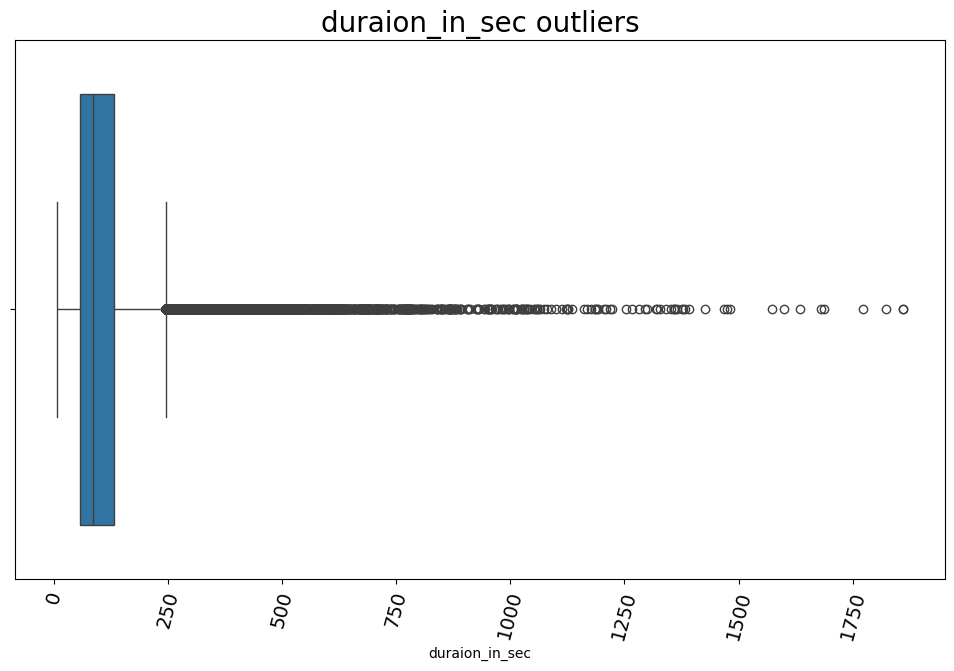

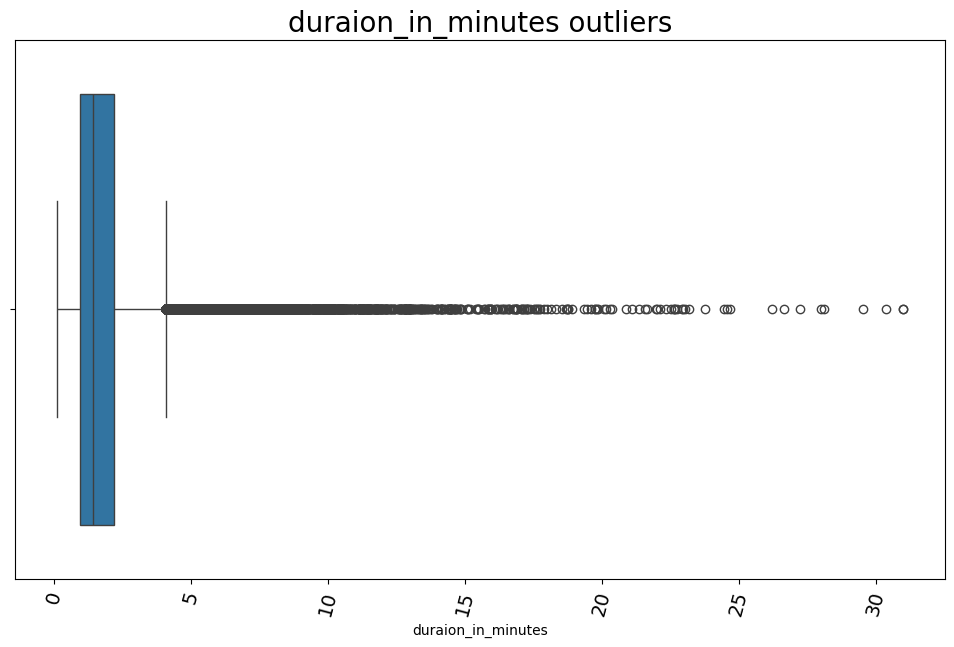

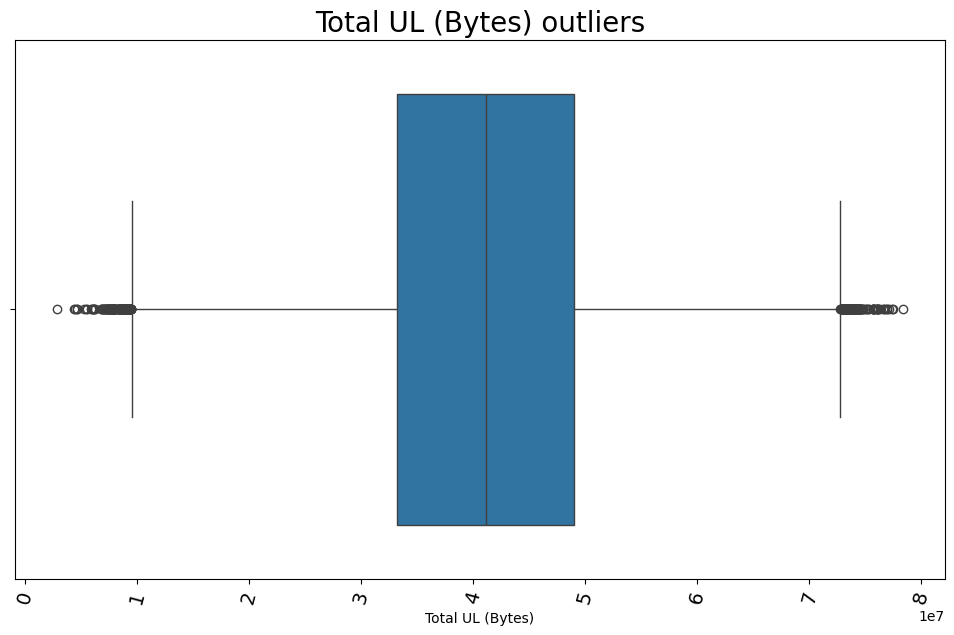

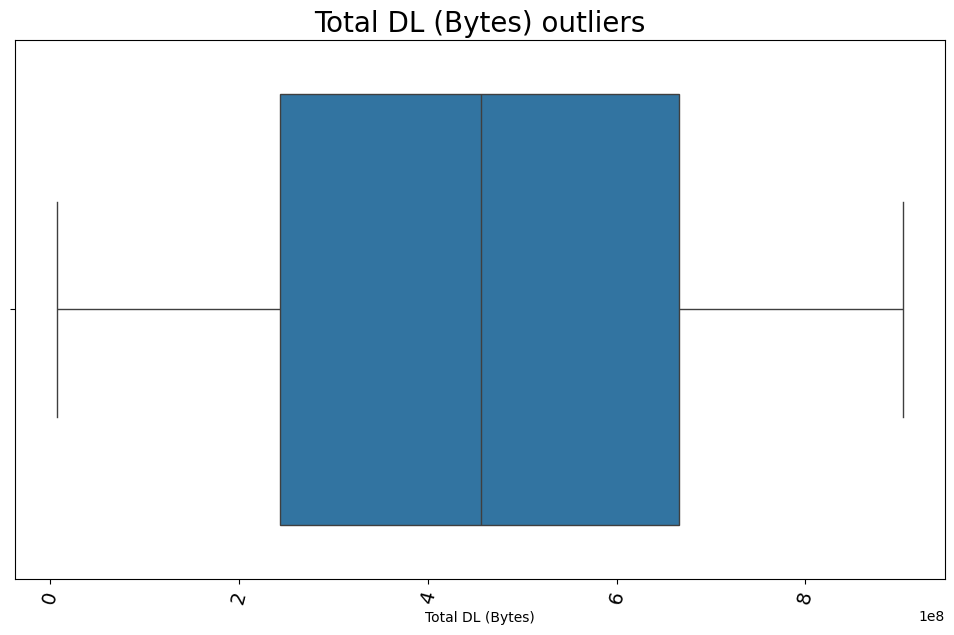

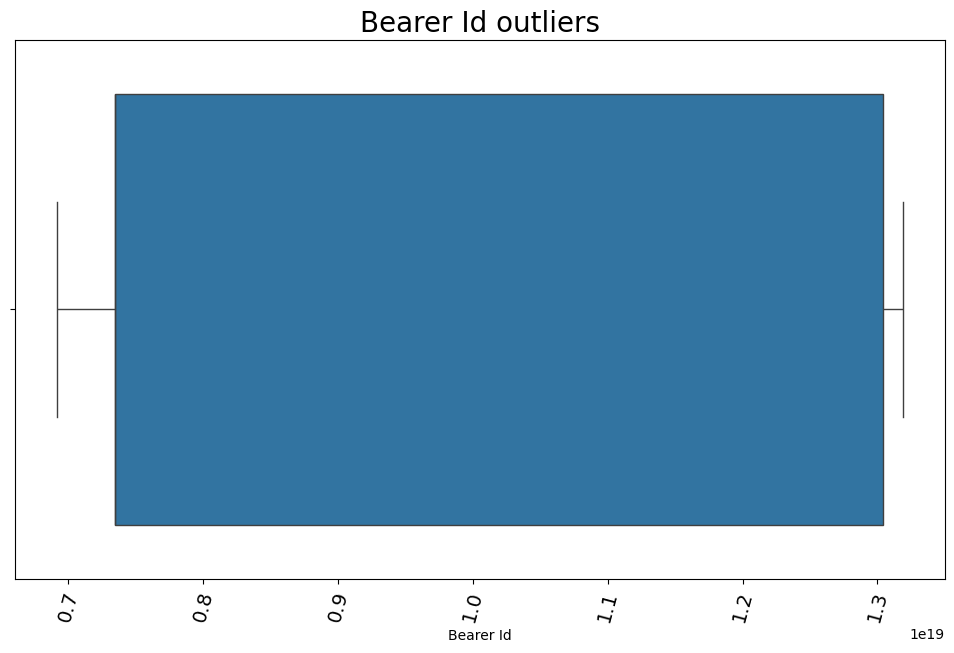

In [62]:
selected_variables = [ 'duraion_in_sec', 'duraion_in_minutes','Total UL (Bytes)', 'Total DL (Bytes)', 'Bearer Id']

for variable in selected_variables:
    plot_box(telecom, variable, variable + ' outliers')

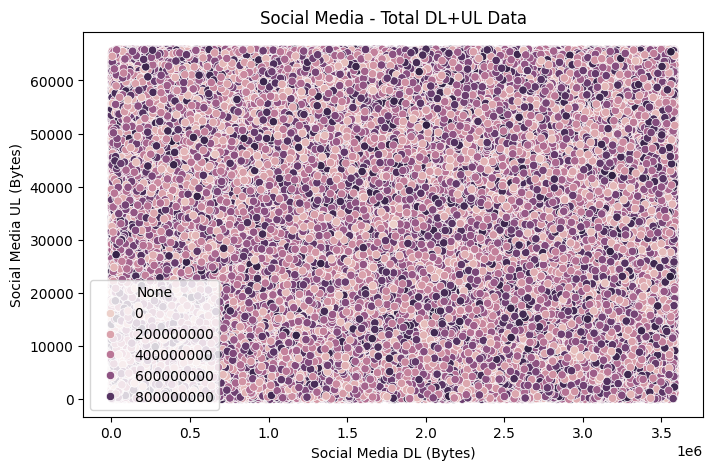

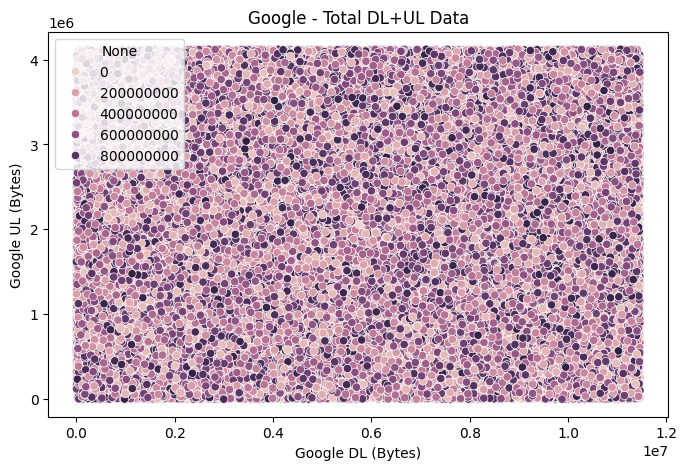

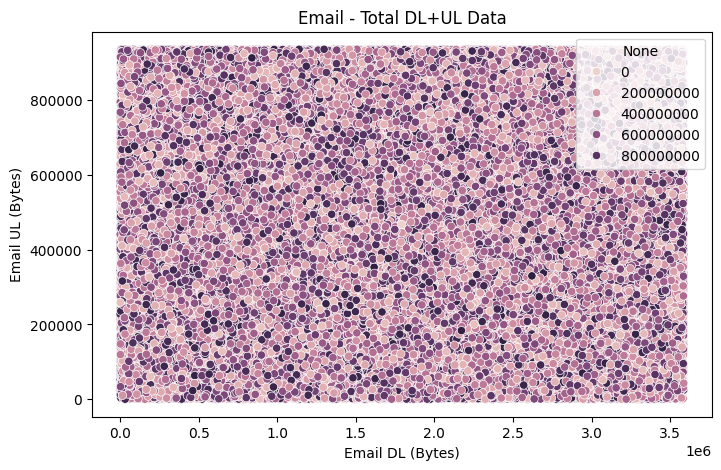

C:\Users\HP\anaconda3\envs\week_1_proj\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


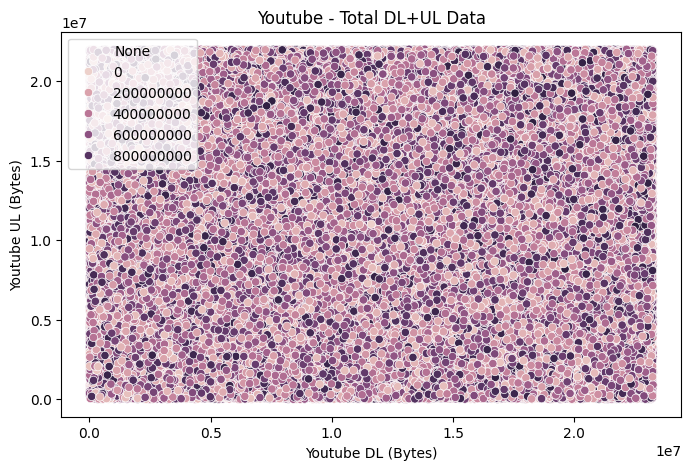

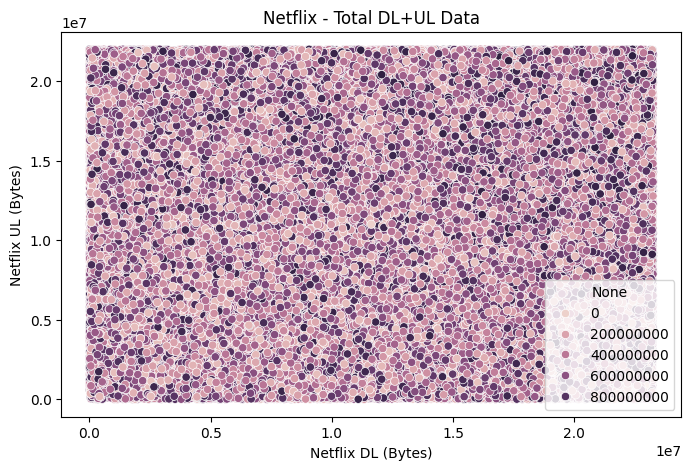

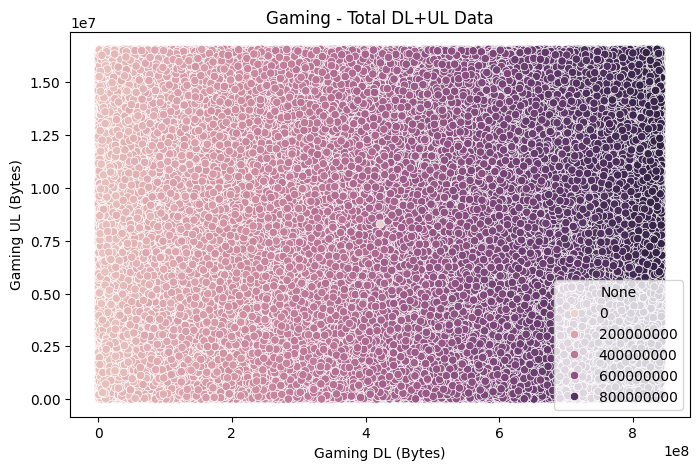

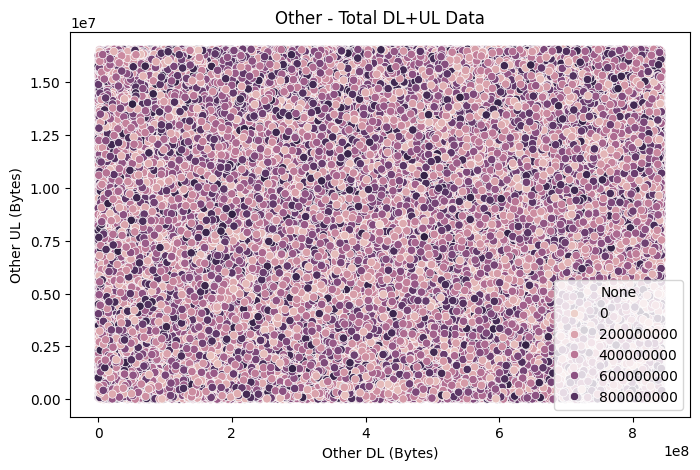

In [65]:
# Plot a scatter plot for each application vs. total DL+UL data
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
total_data_columns = ['Total UL (Bytes)', 'Total DL (Bytes)']

for app in applications:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=telecom[app + ' DL (Bytes)'], y=telecom[app + ' UL (Bytes)'], hue=telecom[total_data_columns].sum(axis=1))
    plt.title(f'{app} - Total DL+UL Data')
    plt.xlabel(f'{app} DL (Bytes)')
    plt.ylabel(f'{app} UL (Bytes)')
    plt.show()


In [52]:
telecom['duraion_in_minutes'].describe()

count    150000.000000
mean          1.743476
std           1.350627
min           0.119033
25%           0.957342
50%           1.439983
75%           2.207171
max          30.988933
Name: duraion_in_minutes, dtype: float64

In [77]:
# Create a new column for total duration in seconds
telecom['total_duration_sec'] = telecom['duraion_in_sec']

# Segment users into decile classes based on total duration
telecom['duration_decile'] = pd.qcut(telecom['total_duration_sec'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=False, duplicates='drop')

# Calculate total data (DL+UL) per decile class
total_data_per_decile = telecom.groupby('duration_decile')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()

print(total_data_per_decile)



                 Total UL (Bytes)  Total DL (Bytes)
duration_decile                                    
0.0                  6.155008e+11      6.822873e+12
1.0                  6.187469e+11      6.826451e+12
2.0                  6.170901e+11      6.861533e+12
3.0                  1.345381e+12      1.479644e+13
4.0                  5.066822e+11      5.580722e+12
5.0                  6.167890e+11      6.821215e+12
6.0                  6.157970e+11      6.801132e+12
7.0                  6.159194e+11      6.842822e+12
8.0                  6.162751e+11      6.843325e+12


In [75]:
import pandas as pd


# Create a new column for total duration in seconds
telecom['total_duration_sec'] = telecom['duraion_in_sec']

# Segment users into decile classes based on total duration
telecom['duration_decile'] = pd.qcut(telecom['total_duration_sec'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=False,) #duplicates='drop')

# Calculate total data (DL+UL) per decile class for the top five deciles
# top_five_deciles = telecom[telecom['duration_decile'] >= 5]  # Filter for top five deciles
total_data_per_decile = top_five_deciles.groupby('duration_decile')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()

print(total_data_per_decile)


Empty DataFrame
Columns: [Total UL (Bytes), Total DL (Bytes)]
Index: []


In [76]:

# Create a new column for total duration in seconds
telecom['total_duration_sec'] = telecom['duraion_in_sec']

# Segment users into decile classes based on total duration
telecom['duration_decile'] = pd.qcut(telecom['total_duration_sec'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=False, duplicates='drop')

# Check the distribution of users across deciles
user_distribution = telecom['duration_decile'].value_counts().sort_index()
print("User distribution across deciles:")
print(user_distribution)

# Filter for top five deciles
top_five_deciles = telecom[telecom['duration_decile'] >= 5]

# Calculate total data (DL+UL) per decile class for the top five deciles
total_data_per_decile = top_five_deciles.groupby('duration_decile')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()

print("\nTotal data per decile for the top five deciles:")
print(total_data_per_decile)


User distribution across deciles:
duration_decile
0.0    30000
1.0    47704
2.0    12296
3.0    30000
4.0    30000
Name: count, dtype: int64

Total data per decile for the top five deciles:
Empty DataFrame
Columns: [Total UL (Bytes), Total DL (Bytes)]
Index: []


In [4]:
# number of users 
number_of_users = telecom['MSISDN/Number'].nunique()
# telecom[ 'MSISDN/Number'].isna().sum()
print (f"number of users = {number_of_users}")

number of users = 106856


In [8]:
telecom['Dur. (ms)'].describe()


count    1.500000e+05
mean     1.046086e+05
std      8.103762e+04
min      7.142000e+03
25%      5.744050e+04
50%      8.639900e+04
75%      1.324302e+05
max      1.859336e+06
Name: Dur. (ms), dtype: float64

In [28]:
# convertin duration to second

telecom ['duraion_in_sec']= telecom['Dur. (ms)']/1000
telecom ['duraion_in_sec']



0         1823.652
1         1365.104
2         1361.762
3         1321.509
4         1089.009
            ...   
149996      81.230
149997      97.970
149998      98.249
149999      97.910
150000         NaN
Name: duraion_in_sec, Length: 150001, dtype: float64

In [51]:
# convertin duration to minutes
telecom ['duraion_in_minutes'] =telecom ['duraion_in_sec']/60
telecom ['duraion_in_minutes']

0         30.394200
1         22.751733
2         22.696033
3         22.025150
4         18.150150
            ...    
149996     1.353833
149997     1.632833
149998     1.637483
149999     1.631833
150000          NaN
Name: duraion_in_minutes, Length: 150001, dtype: float64

In [78]:
telecom.describe()

Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  ...  Gaming DL (Bytes)  Gaming UL (Bytes)  \
count            150000.000000  ...       1.500010e+05       1.500010e+05   
mean              13300.045927  ...       4.220447e+08       8.288398e+06   
std               23971.878541  ...       2.439675e+08       4.782700e+06   
min                   0.000000  ...       2.516000e+03       5.900000e+01   
25%                  43.000000  ...       2.104733e+08       4.128476e+06   
50%                  63.000000  ...       4.234081e+08       8.291208e+06   
75%               19710.750000  ...       6.331742e+08       1.243162e+07   
max              378160.000000  ...       8.434419e+08       1.655879e+07   

       Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  \
count      1.500010e+05      1.500010e+05      1.500000e+05      1.500000e+05   
mean       4.211005e+08      8.264799e+06      4.112121e+07      4.546434e+08   
std        2.432050e+08      4.769004e+06      1.127639e+07      2.441429e+08   
min        3.290000e+03      1.480000e+02      2.866892e+06      7.114041e+06   
25%        2.101869e+08      4.145943e+06      3.322201e+07      2.431068e+08   
50%        4.218030e+08      8.267071e+06      4.114331e+07      4.558411e+08   
75%        6.316918e+08      1.238415e+07      4.903424e+07      6.657055e+08   
max        8.434425e+08      1.655882e+07      7.833131e+07      9.029696e+08   

       duraion_in_sec  duraion_in_minutes  total_duration_sec  duration_decile  
count   150000.000000       150000.000000       150000.000000    150000.000000  
mean       104.608560            1.743476          104.608560         3.881947  
std         81.037621            1.350627           81.037621         2.470670  
min          7.142000            0.119033            7.142000         0.000000  
25%         57.440500            0.957342           57.440500         2.000000  
50%         86.399000            1.439983           86.399000         3.000000  
75%        132.430250            2.207171          132.430250         6.000000  
max       1859.336000           30.988933         1859.336000         8.000000  

[8 rows x 54 columns]

In [7]:
#number of sessions
telecom['Bearer Id'].shape[0]

150001

In [36]:
# the number of session 
telecom['Bearer Id'].count()

149010

In [37]:
# delete null rows
telecom.dropna(subset=['Bearer Id'], inplace=True)


In [31]:
null_count = telecom['Bearer Id'].isnull().sum()
null_count

0

In [27]:
total_dl = telecom['Total DL (Bytes)'].sum()
total_ul = telecom[ 'Total UL (Bytes)'].sum()
print (total_dl,"and", total_ul)


68196514511845.0 and 6168180943816.0


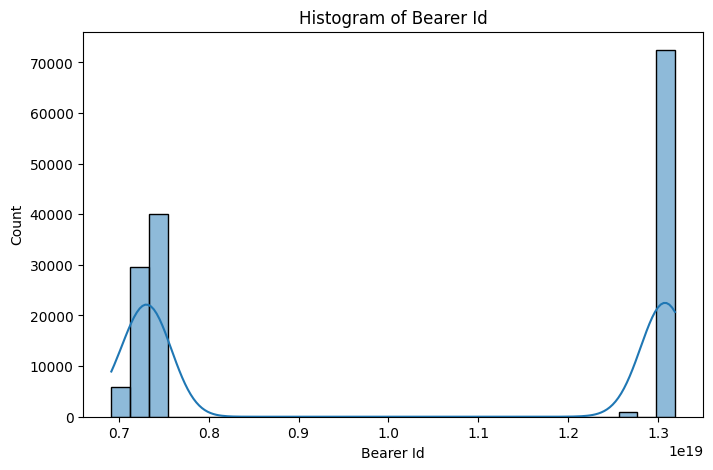

In [30]:
# Plot histograms for selected variables
selected_variables = ['Bearer Id']

for variable in selected_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(telecom[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.show()